In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
train = pd.read_csv('Training Data Set.csv')
test = pd.read_csv('Test Data Set.csv')

In [3]:
train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [5]:
train['data'] = 'Train'
test['data'] = 'Test'

In [6]:
train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
data                       0
dtype: int64

In [7]:
test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
data                      0
dtype: int64

In [8]:
# removing body_type as it is haivng 92% missing values
train.drop(['body_type'],axis=1,inplace=True)
test.drop(['body_type'],axis=1,inplace=True)

In [9]:
test.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
data                     0
dtype: int64

In [10]:
train.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
data                      0
dtype: int64

In [11]:
test['Price'] = np.nan

In [12]:
train.shape

(53515, 17)

In [13]:
test.shape

(5615, 17)

In [14]:
df = pd.concat((train,test),axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,Age of car,Distance,Id,Location,Maker,Owner Type,Price,Vroom Audit Rating,data,door_count,engine_displacement,engine_power,fuel_type,manufacture_year,model,seat_count,transmission
0,55,NaN,25001,Ahmedabad,skoda,Second,543764.25,8,Train,None,1964,147.0,petrol,1964,octavia,None,man
1,7,27750.0,25002,Ahmedabad,fiat,Third,401819.25,6,Train,4,1242,51.0,petrol,2012,panda,4,man
2,5,46000.0,25003,Hyderabad,bmw,Third,2392855.50,7,Train,4,1995,105.0,diesel,2014,x1,5,auto
3,8,43949.0,25004,Mumbai,nissan,Third,958606.50,7,Train,4,1618,140.0,petrol,2011,juke,5,man
4,7,59524.0,25005,Jaipur,bmw,Fourth & Above,3085561.50,7,Train,4,2993,180.0,diesel,2012,x5,5,auto


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59130 entries, 0 to 5614
Data columns (total 17 columns):
Age of car             59130 non-null int64
Distance               57791 non-null float64
Id                     59130 non-null int64
Location               59130 non-null object
Maker                  59130 non-null object
Owner Type             59130 non-null object
Price                  53515 non-null float64
Vroom Audit Rating     59130 non-null int64
data                   59130 non-null object
door_count             59130 non-null object
engine_displacement    59130 non-null int64
engine_power           57523 non-null float64
fuel_type              59130 non-null object
manufacture_year       59130 non-null int64
model                  59130 non-null object
seat_count             59130 non-null object
transmission           59130 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 8.1+ MB


In [17]:
# Removing ID column as it is insignificant
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.head()

,Age of car,Distance,Location,Maker,Owner Type,Price,Vroom Audit Rating,data,door_count,engine_displacement,engine_power,fuel_type,manufacture_year,model,seat_count,transmission
0,55,NaN,Ahmedabad,skoda,Second,543764.25,8,Train,None,1964,147.0,petrol,1964,octavia,None,man
1,7,27750.0,Ahmedabad,fiat,Third,401819.25,6,Train,4,1242,51.0,petrol,2012,panda,4,man
2,5,46000.0,Hyderabad,bmw,Third,2392855.50,7,Train,4,1995,105.0,diesel,2014,x1,5,auto
3,8,43949.0,Mumbai,nissan,Third,958606.50,7,Train,4,1618,140.0,petrol,2011,juke,5,man
4,7,59524.0,Jaipur,bmw,Fourth & Above,3085561.50,7,Train,4,2993,180.0,diesel,2012,x5,5,auto


In [19]:
# checking Null values
df.isnull().sum()

Age of car                0
Distance               1339
Location                  0
Maker                     0
Owner Type                0
Price                  5615
Vroom Audit Rating        0
data                      0
door_count                0
engine_displacement       0
engine_power           1607
fuel_type                 0
manufacture_year          0
model                     0
seat_count                0
transmission              0
dtype: int64

In [20]:
# Null values in price are from test data. so not considering that

In [21]:
# Categorical variables are Location, Maker, Owner Type, door_count, fuel_type, model, seat_count, transmission
# numerical variables are Age of car, distance, price, Vroom Audit Rating, engine_displacement, engine_power, manufacture_year

In [22]:
df['seat_count'].value_counts()

5       42924
None     9402
4        4922
7         934
2         804
3         117
6          23
9           2
8           1
1           1
Name: seat_count, dtype: int64

In [23]:
df['door_count'].value_counts()

4       37391
5        8405
None     8340
2        4779
3         204
6           9
1           2
Name: door_count, dtype: int64

In [24]:
# we have None values in door_count and seat_count. we must impute these values as well.

In [28]:
df['seat_count'].replace('None',np.nan,inplace=True)

In [29]:
df['door_count'].replace('None',np.nan,inplace=True)

In [30]:
df.isnull().sum()

Age of car                0
Distance               1339
Location                  0
Maker                     0
Owner Type                0
Price                  5615
Vroom Audit Rating        0
data                      0
door_count             8340
engine_displacement       0
engine_power           1607
fuel_type                 0
manufacture_year          0
model                     0
seat_count             9402
transmission              0
dtype: int64

In [31]:
temp_price = df['Price']

In [32]:
df1 = df.drop(('Price'),axis=1)

In [34]:
df1.shape

(59130, 15)

In [35]:
temp_price

0        543764.25
1        401819.25
2       2392855.50
3        958606.50
4       3085561.50
           ...    
5610           NaN
5611           NaN
5612           NaN
5613           NaN
5614           NaN
Name: Price, Length: 59130, dtype: float64

In [36]:
# imputing all missing values other than price that is in test dataset
df1.isnull().sum()

Age of car                0
Distance               1339
Location                  0
Maker                     0
Owner Type                0
Vroom Audit Rating        0
data                      0
door_count             8340
engine_displacement       0
engine_power           1607
fuel_type                 0
manufacture_year          0
model                     0
seat_count             9402
transmission              0
dtype: int64

In [41]:
# checking catg columns
cat_cols = df1.select_dtypes(['object']).columns

In [42]:
cat_cols

Index(['Location', 'Maker', 'Owner Type', 'data', 'door_count', 'fuel_type',
       'model', 'seat_count', 'transmission'],
      dtype='object')

In [43]:
num_cols=[]
for i in df.columns:
    if i not in cat_cols:
        num_cols.append(i)

In [44]:
num_cols

['Age of car',
 'Distance ',
 'Price',
 'Vroom Audit Rating',
 'engine_displacement',
 'engine_power',
 'manufacture_year']

In [45]:
df1 = df[num_cols]
df3 = df[cat_cols]

In [46]:
df1.head()

,Age of car,Distance,Price,Vroom Audit Rating,engine_displacement,engine_power,manufacture_year
0,55,NaN,543764.25,8,1964,147.0,1964
1,7,27750.0,401819.25,6,1242,51.0,2012
2,5,46000.0,2392855.50,7,1995,105.0,2014
3,8,43949.0,958606.50,7,1618,140.0,2011
4,7,59524.0,3085561.50,7,2993,180.0,2012


In [47]:
df3.head()

,Location,Maker,Owner Type,data,door_count,fuel_type,model,seat_count,transmission
0,Ahmedabad,skoda,Second,Train,NaN,petrol,octavia,NaN,man
1,Ahmedabad,fiat,Third,Train,4,petrol,panda,4,man
2,Hyderabad,bmw,Third,Train,4,diesel,x1,5,auto
3,Mumbai,nissan,Third,Train,4,petrol,juke,5,man
4,Jaipur,bmw,Fourth & Above,Train,4,diesel,x5,5,auto


In [48]:
df1.isnull().sum()

Age of car                0
Distance               1339
Price                  5615
Vroom Audit Rating        0
engine_displacement       0
engine_power           1607
manufacture_year          0
dtype: int64

In [49]:
df3.isnull().sum()

Location           0
Maker              0
Owner Type         0
data               0
door_count      8340
fuel_type          0
model              0
seat_count      9402
transmission       0
dtype: int64

In [50]:
df1.describe()

,Age of car,Distance,Price,Vroom Audit Rating,engine_displacement,engine_power,manufacture_year
count,59130.000000,5.779100e+04,5.351500e+04,59130.000000,59130.000000,57523.000000,59130.000000
mean,8.584340,9.467385e+04,1.098084e+06,5.998089,1901.370184,100.356136,2010.415660
std,4.658657,2.788909e+05,8.441565e+05,1.416501,1487.932696,45.345649,4.658657
min,3.000000,0.000000e+00,3.000000e+00,4.000000,14.000000,10.000000,1934.000000
25%,5.000000,1.536000e+04,5.051812e+05,5.000000,1395.000000,73.000000,2008.000000
50%,8.000000,6.530000e+04,8.854552e+05,6.000000,1896.000000,91.000000,2011.000000
75%,11.000000,1.351120e+05,1.477829e+06,7.000000,1995.000000,125.000000,2014.000000
max,85.000000,9.899800e+06,2.212078e+07,8.000000,32000.000000,968.000000,2016.000000


In [51]:
# Analysing numerical attributes 
df1.corr()

,Age of car,Distance,Price,Vroom Audit Rating,engine_displacement,engine_power,manufacture_year
Age of car,1.000000,0.227439,-0.506707,-0.003355,0.089372,-0.052100,-1.000000
Distance,0.227439,1.000000,-0.158515,-0.002934,0.119436,0.010572,-0.227439
Price,-0.506707,-0.158515,1.000000,0.005109,0.162072,0.627944,0.506707
Vroom Audit Rating,-0.003355,-0.002934,0.005109,1.000000,-0.004492,-0.000983,0.003355
engine_displacement,0.089372,0.119436,0.162072,-0.004492,1.000000,0.388706,-0.089372
engine_power,-0.052100,0.010572,0.627944,-0.000983,0.388706,1.000000,0.052100
manufacture_year,-1.000000,-0.227439,0.506707,0.003355,-0.089372,0.052100,1.000000


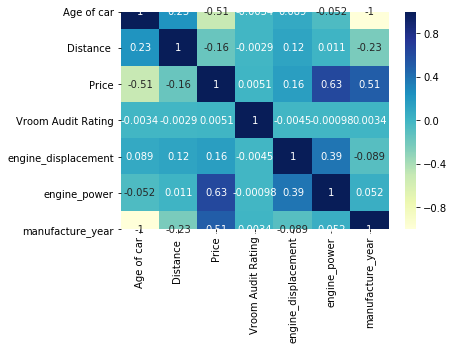

In [52]:
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


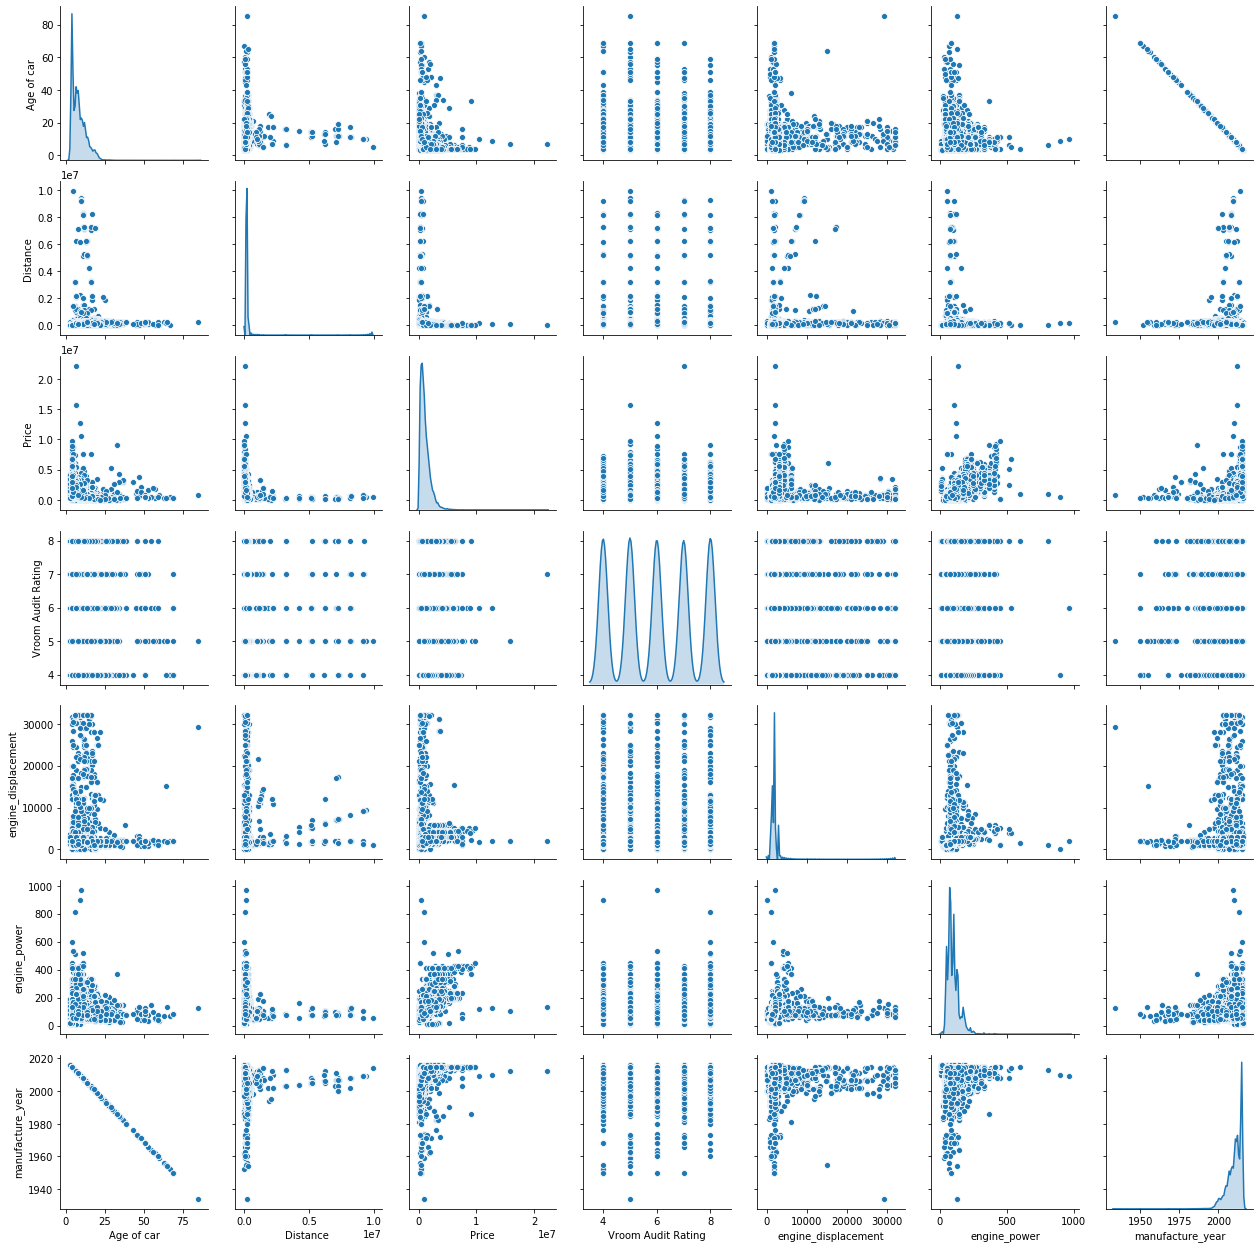

In [53]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

In [54]:
# analysing categorical variables
df3.head()

,Location,Maker,Owner Type,data,door_count,fuel_type,model,seat_count,transmission
0,Ahmedabad,skoda,Second,Train,NaN,petrol,octavia,NaN,man
1,Ahmedabad,fiat,Third,Train,4,petrol,panda,4,man
2,Hyderabad,bmw,Third,Train,4,diesel,x1,5,auto
3,Mumbai,nissan,Third,Train,4,petrol,juke,5,man
4,Jaipur,bmw,Fourth & Above,Train,4,diesel,x5,5,auto


In [56]:
df3.isnull().sum()

Location           0
Maker              0
Owner Type         0
data               0
door_count      8340
fuel_type          0
model              0
seat_count      9402
transmission       0
dtype: int64

In [57]:
df3['door_count'].mode()

0    4
dtype: object

In [58]:
df3['seat_count'].mode()

0    5
dtype: object

In [61]:
df3['door_count'].replace(np.nan,'4',inplace=True)
df3['seat_count'].replace(np.nan,'5',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
df3.isnull().sum()

Location        0
Maker           0
Owner Type      0
data            0
door_count      0
fuel_type       0
model           0
seat_count      0
transmission    0
dtype: int64

In [64]:
df3.head()

,Location,Maker,Owner Type,data,door_count,fuel_type,model,seat_count,transmission
0,Ahmedabad,skoda,Second,Train,4,petrol,octavia,5,man
1,Ahmedabad,fiat,Third,Train,4,petrol,panda,4,man
2,Hyderabad,bmw,Third,Train,4,diesel,x1,5,auto
3,Mumbai,nissan,Third,Train,4,petrol,juke,5,man
4,Jaipur,bmw,Fourth & Above,Train,4,diesel,x5,5,auto


In [66]:
for col in cat_cols:
    freqs = df3[col].value_counts()
    k = freqs.index[freqs>20][:-1]
    for cat in k:
        name = col+'_'+cat
        df3[name]=(df3[col]==cat).astype(int)
    del df3[col]
    print(col)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Location
Maker
Owner Type
data
door_count
fuel_type
model
seat_count
transmission


In [67]:
df3.columns

Index(['Location_Kochi', 'Location_Coimbatore', 'Location_Bangalore',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Jaipur',
       'Location_Delhi', 'Location_Pune', 'Location_Chennai',
       'Location_Hyderabad', 'Maker_skoda', 'Maker_toyota', 'Maker_audi',
       'Maker_bmw', 'Maker_nissan', 'Maker_hyundai', 'Maker_fiat',
       'Owner Type_First', 'Owner Type_Third', 'Owner Type_Fourth & Above',
       'data_Train', 'door_count_4', 'door_count_5', 'door_count_2',
       'fuel_type_diesel', 'model_octavia', 'model_superb', 'model_yaris',
       'model_qashqai', 'model_x3', 'model_x1', 'model_i30', 'model_q5',
       'model_x5', 'model_yeti', 'model_panda', 'model_q3', 'model_coupe',
       'model_micra', 'model_auris', 'model_avensis', 'model_aygo',
       'model_rapid', 'model_roomster', 'model_q7', 'model_citigo',
       'model_juke', 'seat_count_5', 'seat_count_4', 'seat_count_7',
       'seat_count_2', 'seat_count_3', 'transmission_man'],
      dtype='object')

In [68]:
df3.shape

(59130, 53)

In [70]:
df3['data'] = df['data']

In [71]:
df1.head()

,Age of car,Distance,Price,Vroom Audit Rating,engine_displacement,engine_power,manufacture_year
0,55,NaN,543764.25,8,1964,147.0,1964
1,7,27750.0,401819.25,6,1242,51.0,2012
2,5,46000.0,2392855.50,7,1995,105.0,2014
3,8,43949.0,958606.50,7,1618,140.0,2011
4,7,59524.0,3085561.50,7,2993,180.0,2012


In [72]:
df3.head()

,Location_Kochi,Location_Coimbatore,Location_Bangalore,Location_Kolkata,Location_Mumbai,Location_Jaipur,Location_Delhi,Location_Pune,Location_Chennai,Location_Hyderabad,...,model_q7,model_citigo,model_juke,seat_count_5,seat_count_4,seat_count_7,seat_count_2,seat_count_3,transmission_man,data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,Train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Train
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Train
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,Train
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Train


In [73]:
df3.shape

(59130, 54)

In [74]:
df3.drop(['data_Train'],axis=1,inplace=True)

In [75]:
df3.shape

(59130, 53)

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59130 entries, 0 to 5614
Data columns (total 53 columns):
Location_Kochi               59130 non-null int32
Location_Coimbatore          59130 non-null int32
Location_Bangalore           59130 non-null int32
Location_Kolkata             59130 non-null int32
Location_Mumbai              59130 non-null int32
Location_Jaipur              59130 non-null int32
Location_Delhi               59130 non-null int32
Location_Pune                59130 non-null int32
Location_Chennai             59130 non-null int32
Location_Hyderabad           59130 non-null int32
Maker_skoda                  59130 non-null int32
Maker_toyota                 59130 non-null int32
Maker_audi                   59130 non-null int32
Maker_bmw                    59130 non-null int32
Maker_nissan                 59130 non-null int32
Maker_hyundai                59130 non-null int32
Maker_fiat                   59130 non-null int32
Owner Type_First             59130 non-nul

In [77]:
# concatenating catg and num data
df4 = pd.concat((df1,df3),axis=1)

In [78]:
df4.shape

(59130, 60)

In [79]:
df4.isnull().sum()

Age of car                      0
Distance                     1339
Price                        5615
Vroom Audit Rating              0
engine_displacement             0
engine_power                 1607
manufacture_year                0
Location_Kochi                  0
Location_Coimbatore             0
Location_Bangalore              0
Location_Kolkata                0
Location_Mumbai                 0
Location_Jaipur                 0
Location_Delhi                  0
Location_Pune                   0
Location_Chennai                0
Location_Hyderabad              0
Maker_skoda                     0
Maker_toyota                    0
Maker_audi                      0
Maker_bmw                       0
Maker_nissan                    0
Maker_hyundai                   0
Maker_fiat                      0
Owner Type_First                0
Owner Type_Third                0
Owner Type_Fourth & Above       0
door_count_4                    0
door_count_5                    0
door_count_2  

In [85]:
temp = df4[['Price','data']]

In [86]:
df4.drop(['Price','data'],axis=1,inplace=True)

In [87]:
df4.shape

(59130, 58)

In [88]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59130 entries, 0 to 5614
Data columns (total 58 columns):
Age of car                   59130 non-null int64
Distance                     57791 non-null float64
Vroom Audit Rating           59130 non-null int64
engine_displacement          59130 non-null int64
engine_power                 57523 non-null float64
manufacture_year             59130 non-null int64
Location_Kochi               59130 non-null int32
Location_Coimbatore          59130 non-null int32
Location_Bangalore           59130 non-null int32
Location_Kolkata             59130 non-null int32
Location_Mumbai              59130 non-null int32
Location_Jaipur              59130 non-null int32
Location_Delhi               59130 non-null int32
Location_Pune                59130 non-null int32
Location_Chennai             59130 non-null int32
Location_Hyderabad           59130 non-null int32
Maker_skoda                  59130 non-null int32
Maker_toyota                 59130 non

In [95]:
df4['Distance '].fillna(value=df4['Distance '].median(),inplace=True)

In [98]:
df4['engine_power'].fillna(value=df4['engine_power'].median(),inplace=True)

In [99]:
df4.isnull().sum()

Age of car                   0
Distance                     0
Vroom Audit Rating           0
engine_displacement          0
engine_power                 0
manufacture_year             0
Location_Kochi               0
Location_Coimbatore          0
Location_Bangalore           0
Location_Kolkata             0
Location_Mumbai              0
Location_Jaipur              0
Location_Delhi               0
Location_Pune                0
Location_Chennai             0
Location_Hyderabad           0
Maker_skoda                  0
Maker_toyota                 0
Maker_audi                   0
Maker_bmw                    0
Maker_nissan                 0
Maker_hyundai                0
Maker_fiat                   0
Owner Type_First             0
Owner Type_Third             0
Owner Type_Fourth & Above    0
door_count_4                 0
door_count_5                 0
door_count_2                 0
fuel_type_diesel             0
model_octavia                0
model_superb                 0
model_ya

In [100]:
fin_df = pd.concat((df4,temp),axis=1)

In [101]:
fin_df.shape

(59130, 60)

In [103]:
fin_df.isnull().sum()

Age of car                      0
Distance                        0
Vroom Audit Rating              0
engine_displacement             0
engine_power                    0
manufacture_year                0
Location_Kochi                  0
Location_Coimbatore             0
Location_Bangalore              0
Location_Kolkata                0
Location_Mumbai                 0
Location_Jaipur                 0
Location_Delhi                  0
Location_Pune                   0
Location_Chennai                0
Location_Hyderabad              0
Maker_skoda                     0
Maker_toyota                    0
Maker_audi                      0
Maker_bmw                       0
Maker_nissan                    0
Maker_hyundai                   0
Maker_fiat                      0
Owner Type_First                0
Owner Type_Third                0
Owner Type_Fourth & Above       0
door_count_4                    0
door_count_5                    0
door_count_2                    0
fuel_type_dies

In [104]:
# splitting train and test datasets
train_data = fin_df[fin_df['data']=='Train']
del train_data['data']
test_data = fin_df[fin_df['data']=='Test']
test_data.drop(['Price','data'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
train_data.shape

(53515, 59)

In [106]:
test_data.shape

(5615, 58)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [108]:
X = train_data.drop(('Price'),axis=1)
y = train_data['Price']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [110]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37460, 58)
(37460,)
(16055, 58)
(16055,)


In [111]:
lr = LinearRegression()

In [112]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
lr.intercept_

-85202576.94611259

In [114]:
y_pred = lr.predict(x_test)

In [115]:
mean_squared_error(y_test,y_pred)**0.5

419557.6938489421

In [116]:
import statsmodels.api as sm

In [117]:
inp_c=sm.add_constant(X)
ols1=sm.OLS(y,inp_c)
mod1=ols1.fit()
mod1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2738.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:45:14   Log-Likelihood:            -7.7109e+05
No. Observations:               53515   AIC:                         1.542e+06
Df Residuals:                   53461   BIC:                         1.543e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -41.3274      0.248   -166.348      0.000     -41.814     -40.841
Age of car                -8.453e+04    496.397   -170.295      0.000   -8.55e+04   -8.36e+04
Distance                     -0.1704      0.007    -23.688      0.000      -0.185      -0.156
Vroom Audit Rating         1048.6563   1336.241      0.785      0.433   -1570.388    3667.700
engine_displacement          -3.1757      1.368     -2.322      0.020      -5.856      -0.495
engine_power               4239.4598     76.487     55.427      0.000    4089.545    4389.375
manufacture_year           1094.0159     59.168     18.490      0.000     978.046    1209.986
Location_Kochi              1.99e+04   8885.727      2.240      0.025    2486.254    3.73e+04
Location_Coimbatore        2.391e+04   8883.550      2.692      0.007    6498.526    4.13e+04
Location_Bangalore         6470.4788   8926.251      0.725      0.469    -1.1e+04     2.4e+04
Location_Kolkata           1.511e+04   8931.233      1.692      0.091   -2394.143    3.26e+04
Location_Mumbai             1.22e+04   8934.585      1.366      0.172   -5309.766    2.97e+04
Location_Jaipur            1.718e+04   8930.896      1.924      0.054    -322.123    3.47e+04
Location_Delhi             7940.5989   8952.043      0.887      0.375   -9605.481    2.55e+04
Location_Pune              1.208e+04   8935.398      1.352      0.177   -5436.817    2.96e+04
Location_Chennai           1.957e+04   8946.002      2.188      0.029    2035.739    3.71e+04
Location_Hyderabad         1.384e+04   8961.184      1.544      0.123   -3727.172    3.14e+04
Maker_skoda               -6.721e+05   6.54e+04    -10.279      0.000      -8e+05   -5.44e+05
Maker_toyota              -6.467e+05    6.1e+04    -10.594      0.000   -7.66e+05   -5.27e+05
Maker_audi                -1.949e+05   7.29e+04     -2.674      0.008   -3.38e+05    -5.2e+04
Maker_bmw                 -1.034e+05   5.67e+04     -1.825      0.068   -2.15e+05    7674.021
Maker_nissan              -5.578e+05   5.73e+04     -9.728      0.000    -6.7e+05   -4.45e+05
Maker_hyundai             -8.706e+05   7.93e+04    -10.984      0.000   -1.03e+06   -7.15e+05
Maker_fiat                 2.666e+05   8.82e+04      3.022      0.003    9.37e+04    4.39e+05
Owner Type_First           8871.7406   5359.736      1.655      0.098   -1633.387    1.94e+04
Owner Type_Third           -978.9955   5361.391     -0.183      0.855   -1.15e+04    9529.376
Owner Type_Fourth & Above -3792.2794   5364.571     -0.707      0.480   -1.43e+04    6722.324
door_count_4              -3.051e+04   3.27e+04     -0.933      0.351   -9.46e+04    3.36e+04
door_count_5              -5.093e+04   3.31e+04     -1.539      0.124   -1.16e+05    1.39e+04
door_count_2               1.828e+05   3.32e+04      5.510      0.000    1.

In [118]:
while(len(X.columns)>0):
    inp_c=sm.add_constant(X)
    ols_pf=sm.OLS(np.asarray(y),inp_c)
    mod_pf=ols_pf.fit()
    f=mod_pf.pvalues[1:].idxmax()
    if mod_pf.pvalues[1:].max()>0.05:
        X = X.drop(f,1)
    else:
        break
print('The final features trough backward eliminations are :',X.columns)

The final features trough backward eliminations are : Index(['Age of car', 'Distance ', 'engine_displacement', 'engine_power',
       'manufacture_year', 'Maker_skoda', 'Maker_toyota', 'Maker_audi',
       'Maker_nissan', 'Maker_hyundai', 'Maker_fiat', 'Owner Type_First',
       'door_count_5', 'door_count_2', 'fuel_type_diesel', 'model_superb',
       'model_yaris', 'model_x1', 'model_q5', 'model_yeti', 'model_panda',
       'model_q3', 'model_coupe', 'model_micra', 'model_auris', 'model_aygo',
       'model_rapid', 'model_roomster', 'model_q7', 'model_citigo',
       'model_juke', 'seat_count_5', 'seat_count_4', 'seat_count_2',
       'seat_count_3', 'transmission_man'],
      dtype='object')


In [119]:
mod_pf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     4146.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:45:44   Log-Likelihood:            -7.7110e+05
No. Observations:               53515   AIC:                         1.542e+06
Df Residuals:                   53479   BIC:                         1.543e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.3107      0.242   -170.791      0.000     -41.785     -40.837
Age of car           -8.45e+04    490.908   -172.139      0.000   -8.55e+04   -8.35e+04
Distance               -0.1705      0.007    -23.703      0.000      -0.185      -0.156
engine_displacement    -3.2190      1.367     -2.355      0.019      -5.898      -0.540
engine_power         4234.5329     72.460     58.440      0.000    4092.511    4376.554
manufacture_year     1097.9463     11.394     96.361      0.000    1075.614    1120.279
Maker_skoda         -6.228e+05   9365.774    -66.497      0.000   -6.41e+05   -6.04e+05
Maker_toyota        -6.016e+05   1.39e+04    -43.366      0.000   -6.29e+05   -5.74e+05
Maker_audi          -1.444e+05   1.83e+04     -7.902      0.000    -1.8e+05   -1.09e+05
Maker_nissan        -5.242e+05   1.19e+04    -43.937      0.000   -5.48e+05   -5.01e+05
Maker_hyundai       -8.337e+05   1.33e+04    -62.900      0.000    -8.6e+05   -8.08e+05
Maker_fiat           3.135e+05   5.42e+04      5.785      0.000    2.07e+05     4.2e+05
Owner Type_First     1.041e+04   4373.509      2.380      0.017    1838.281     1.9e+04
door_count_5        -2.071e+04   5989.251     -3.458      0.001   -3.25e+04   -8973.319
door_count_2         2.132e+05   1.08e+04     19.681      0.000    1.92e+05    2.34e+05
fuel_type_diesel     3.873e+04   4644.750      8.339      0.000    2.96e+04    4.78e+04
model_superb         4.953e+04   8979.706      5.516      0.000    3.19e+04    6.71e+04
model_yaris         -1.731e+05   1.44e+04    -12.043      0.000   -2.01e+05   -1.45e+05
model_x1             -2.41e+05   1.15e+04    -21.000      0.000   -2.64e+05   -2.19e+05
model_q5             3.464e+05   1.97e+04     17.548      0.000    3.08e+05    3.85e+05
model_yeti           5.359e+04   1.11e+04      4.824      0.000    3.18e+04    7.54e+04
model_panda         -1.055e+06   5.47e+04    -19.265      0.000   -1.16e+06   -9.47e+05
model_q3             2.495e+05   2.02e+04     12.343      0.000     2.1e+05    2.89e+05
model_coupe          4.108e+04   1.84e+04      2.237      0.025    5088.710    7.71e+04
model_micra         -2.389e+05   1.48e+04    -16.176      0.000   -2.68e+05    -2.1e+05
model_auris         -1.125e+05    1.6e+04     -7.033      0.000   -1.44e+05   -8.11e+04
model_aygo          -3.171e+05   1.89e+04    -16.738      0.000   -3.54e+05    -2.8e+05
model_rapid         -1.937e+05    1.3e+04    -14.933      0.000   -2.19e+05   -1.68e+05
model_roomster      -1.353e+05    1.3e+04    -10.416      0.000   -1.61e+05    -1.1e+05
model_q7              6.04e+05   2.22e+04     27.214      0.000     5.6e+05    6.47e+05
model_citigo        -4.024e+05   1.77e+04    -22.795      0.000   -4.37e+05   -3.68e+05
model_juke          -2.501e+05   1.66e+04    -15.106      0.000   -2.83e+05   -2.18e+05
sea

In [120]:
X = train_data[X.columns]
y = train_data['Price']

In [121]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [122]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
y_pred1 = lr1.predict(x_test)

In [124]:
mean_squared_error(y_test,y_pred1)**0.5

415666.85538707435

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor()

In [127]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [128]:
y_pred_rf = rf.predict(x_test)

In [129]:
mean_squared_error(y_test,y_pred_rf)**0.5

196027.9086612079

In [130]:
sub = pd.read_csv('Sample Submission-1.csv')

In [131]:
sub.head()

,Unique Id,Price
0,11001,375147.00
1,11002,1193368.50
2,11003,1523871.00
3,11004,2180268.00
4,11005,2704149.75


In [132]:
sub.shape

(5615, 2)

In [136]:
x_test.shape

(10703, 36)

In [137]:
to_test = test_data[X.columns]

In [138]:
final_pred = rf.predict(to_test)

In [139]:
sub['Price'] = final_pred

In [140]:
sub.head()

,Unique Id,Price
0,11001,3.754257e+05
1,11002,9.632316e+05
2,11003,1.332016e+06
3,11004,2.371267e+06
4,11005,2.959400e+06


In [141]:
sub.to_csv('submission1.csv',index=False)

In [144]:
rf_final = RandomForestRegressor()
rf_final.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [146]:
final_pred1 = rf_final.predict(to_test)

In [147]:
sub = pd.read_csv('Sample Submission-1.csv')
sub['Price'] = final_pred1

In [148]:
sub.head()

,Unique Id,Price
0,11001,3.746136e+05
1,11002,9.652757e+05
2,11003,1.322271e+06
3,11004,2.381362e+06
4,11005,3.066930e+06


In [149]:
sub.to_csv('submission2.csv',index=False)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc = StandardScaler()

In [152]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [155]:
rf_sc = RandomForestRegressor()
rf_sc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [156]:
y_pred_rf_sc = rf_sc.predict(x_test)
mean_squared_error(y_test,y_pred_rf_sc)**0.5

196986.40594560385

In [157]:
import xgboost as xgb

In [183]:
xgb_mod = xgb.XGBRegressor(max_depth=10,learning_rate=0.5)

In [184]:
xgb_mod.fit(x_train,y_train)

C:\Users\Pavan\AppData\Roaming\Python\Python37\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [182]:
y_pred_xg = xgb_mod.predict(x_test)
mean_squared_error(y_test,y_pred_xg)**0.5

216198.72806610478

In [170]:
xgb_mod = xgb.XGBRegressor(max_depth=10)
xgb_mod.fit(X,y)
#y_pred_xg = xgb_mod.predict(x_test)

C:\Users\Pavan\AppData\Roaming\Python\Python37\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Pavan\AppData\Roaming\Python\Python37\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:27:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [171]:
y_pred_xg = xgb_mod.predict(to_test)

In [172]:
sub = pd.read_csv('Sample Submission-1.csv')
sub['Price'] = y_pred_xg
sub.to_csv('submission4.csv',index=False)

In [173]:
sub.head()

,Unique Id,Price
0,11001,3.989111e+05
1,11002,1.018983e+06
2,11003,1.477694e+06
3,11004,2.361950e+06
4,11005,2.976288e+06
